# Tesco Large

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import datetime as dt
import statsmodels.api as sm 
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px

## Exploration of the dataset 

In [3]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")
mcv_dig_400g=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G SNGL.xlsx")
mcv_dig_400g_twin=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G 2PACK.xlsx")
mcv_rt_300g=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM SNGL.xlsx")
mcv_rt_300g_twin=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM 2 PCK.xlsx")


In [4]:
def data(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x.index=x.index+1
    df=x[['Date','Volume']]
    df=df.set_index('Date')
    return df


mcv_dig_250g=data(mcv_dig_250g)
mcv_dig_400g=data(mcv_dig_400g)
mcv_dig_400g_twin=data(mcv_dig_400g_twin)
mcv_rt_300g=data(mcv_rt_300g)
mcv_rt_300g_twin=data(mcv_rt_300g_twin)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Pladis products decomposition graph

<Figure size 720x432 with 0 Axes>

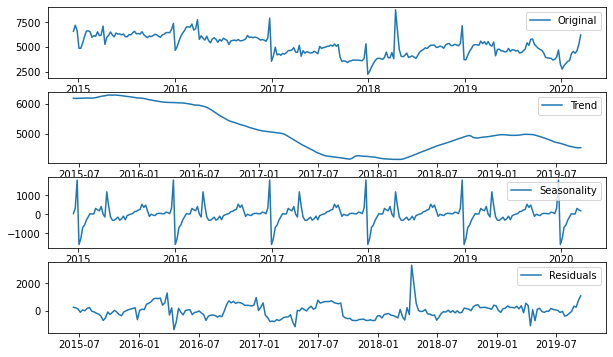

<Figure size 720x432 with 0 Axes>

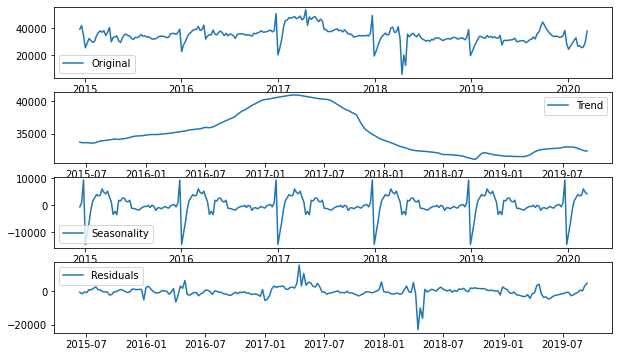

<Figure size 720x432 with 0 Axes>

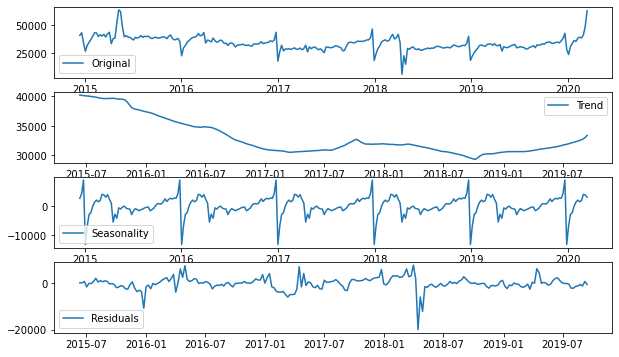

<Figure size 720x432 with 0 Axes>

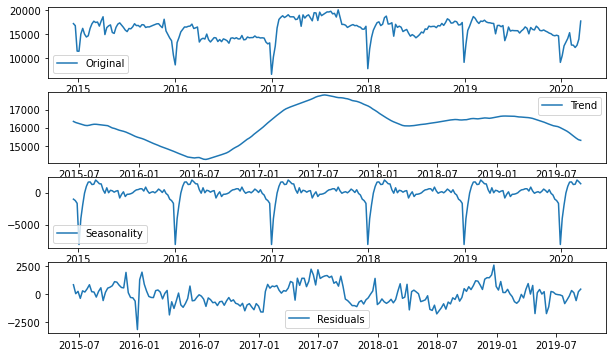

<Figure size 720x432 with 0 Axes>

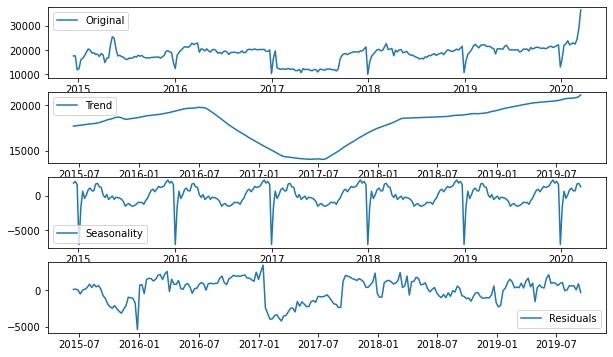

In [5]:
#decomposition for pladis products
from statsmodels.tsa.seasonal import seasonal_decompose

mcv_list=[mcv_dig_250g,mcv_dig_400g,mcv_dig_400g_twin,mcv_rt_300g,mcv_rt_300g_twin]

for df in mcv_list:
    decomposition=seasonal_decompose(df)
    
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    
    plt.figure(figsize=(10,6))
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.show()


#### Competitors' products decomposition graph

In [6]:
#competitors products
tes_dig_400g=pd.read_excel("Tesco Large/Tesco Large (own label) TSC DGSTVS PLN 400 GM SNGL.xlsx")
tes_mill_400g=pd.read_excel("Tesco Large/Tesco Large (own label) 'TSC-MS-MLL'S-DGSTV-BSCTS PLN 400 GM SNGL.xlsx")
tes_rt_250g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T FNGRS PLN 250 GM SNGL.xlsx")
tes_rt_300g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")


In [7]:
def data(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x.index=x.index+1
    x=x[['Date','Volume']]
    x=x.set_index('Date')
    return x


tes_dig_400g=data(tes_dig_400g)
tes_mill_400g=data(tes_mill_400g)
tes_rt_250g=data(tes_rt_250g)
tes_rt_300g=data(tes_rt_300g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 720x432 with 0 Axes>

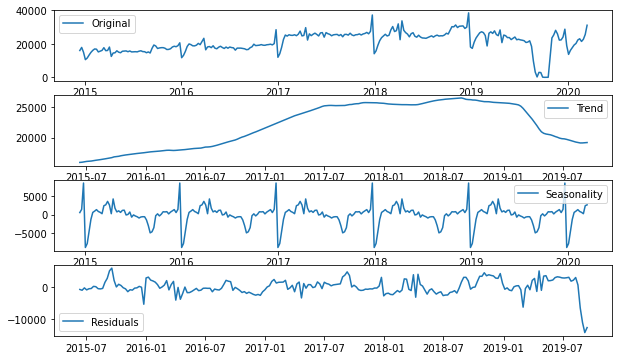

<Figure size 720x432 with 0 Axes>

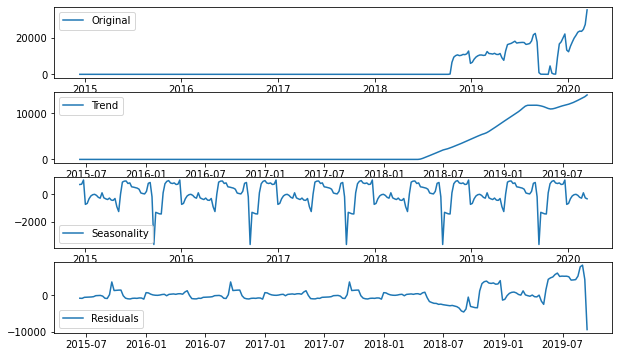

<Figure size 720x432 with 0 Axes>

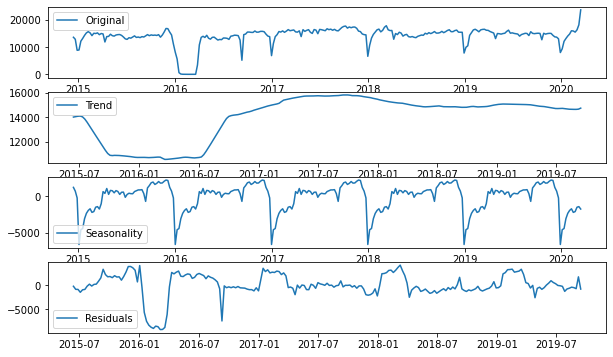

<Figure size 720x432 with 0 Axes>

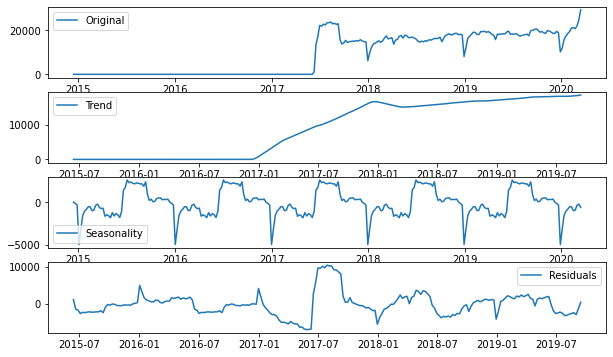

In [8]:
#competitors' products
from statsmodels.tsa.seasonal import seasonal_decompose

tes_list=[tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]

for df in tes_list:
    decomposition=seasonal_decompose(df)
    
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    
    plt.figure(figsize=(10,6))
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.show()

#### Compare trends with Pladis product and competitors' product

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

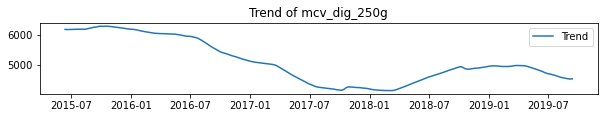

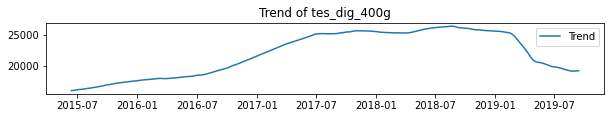

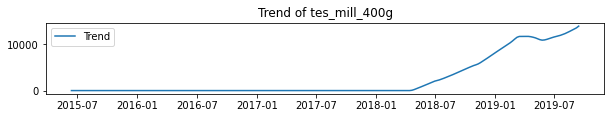

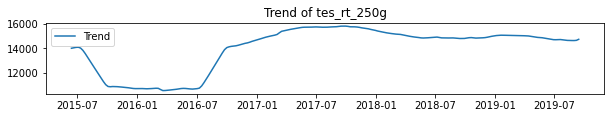

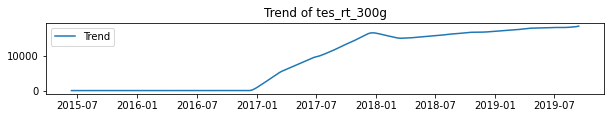

In [9]:
mcv_dig_250g_competitor=[mcv_dig_250g,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_250g_competitor_list=['mcv_dig_250g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_dig_400g_competitor=[mcv_dig_400g,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_400g_competitor_list=['mcv_dig_400g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_dig_400g_twin_competitor=[mcv_dig_400g_twin,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_dig_400g_twin_competitor_list=['mcv_dig_400g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_rt_300g_competitor=[mcv_rt_300g,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_rt_300g_competitor_list=['mcv_rt_300g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']
mcv_rt_300g_twin_competitor=[mcv_rt_300g_twin,tes_dig_400g,tes_mill_400g,tes_rt_250g,tes_rt_300g]
mcv_rt_300g_twin_competitor_list=['mcv_rt_300g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g']

product_name=['mcv_dig_250g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
             'mcv_dig_400g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_dig_400g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_rt_300g','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g',
              'mcv_rt_300g_twin','tes_dig_400g','tes_mill_400g','tes_rt_250g','tes_rt_300g'
             ]

i=0
for product in mcv_dig_250g_competitor:
    decomposition=seasonal_decompose(product)
    trend_1=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_1, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_250g_competitor_list[i] )
    i=i+1
    

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

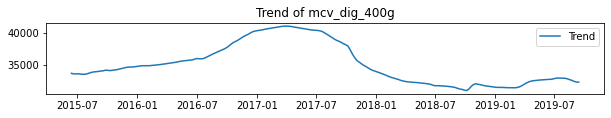

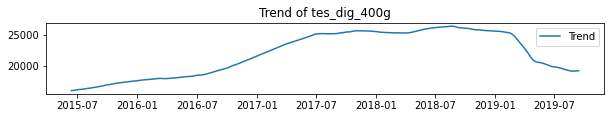

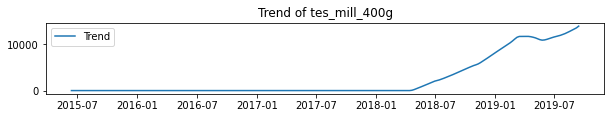

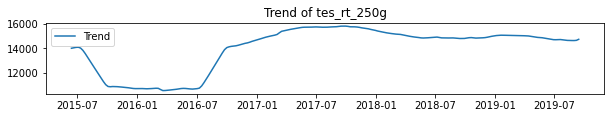

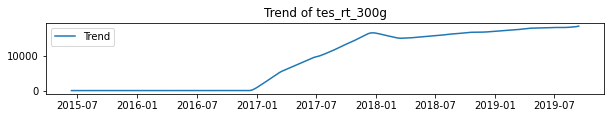

In [10]:
i=0
for product in mcv_dig_400g_competitor:
    decomposition=seasonal_decompose(product)
    trend_2=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_2, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_400g_competitor_list[i])
    i=i+1

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_dig_400g_twin')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

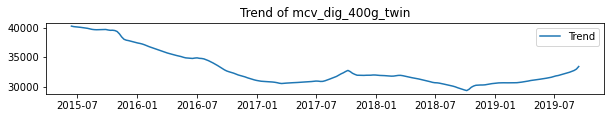

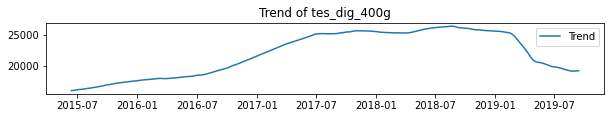

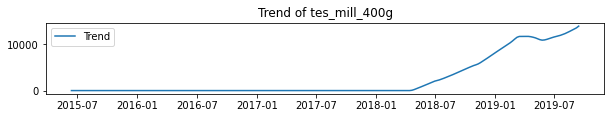

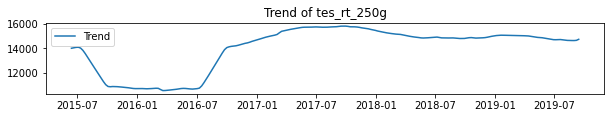

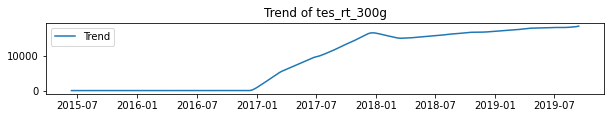

In [11]:
i=0
for product in mcv_dig_400g_twin_competitor:
    decomposition=seasonal_decompose(product)
    trend_3=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_3, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_dig_400g_twin_competitor_list[i])
    i=i+1

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_rt_300g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

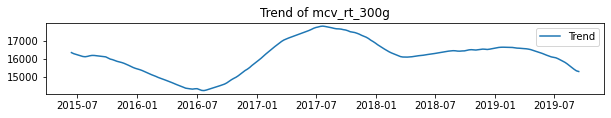

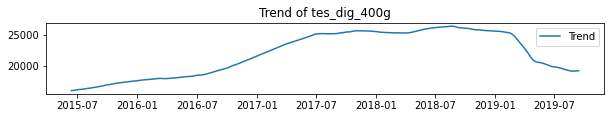

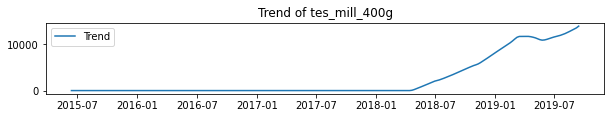

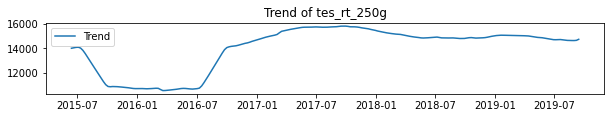

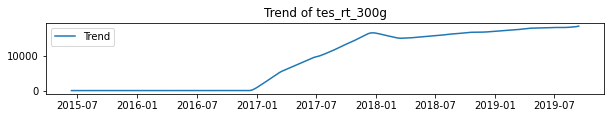

In [12]:
i=0
for product in mcv_rt_300g_competitor:
    decomposition=seasonal_decompose(product)
    trend_4=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_4, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_rt_300g_competitor_list[i])
    i=i+1

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of mcv_rt_300g_twin')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_dig_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_mill_400g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_250g')

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Trend of tes_rt_300g')

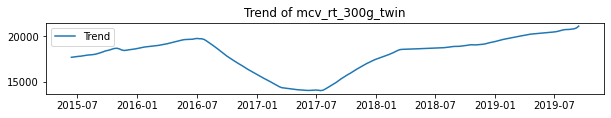

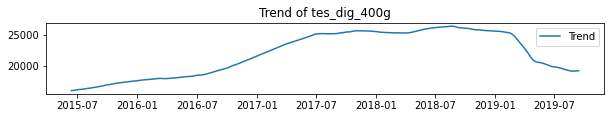

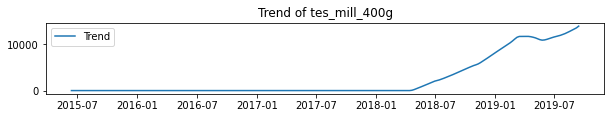

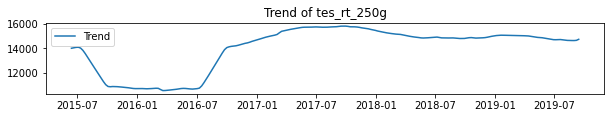

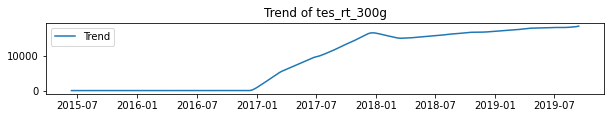

In [13]:
i=0
for product in mcv_rt_300g_twin_competitor:
    decomposition=seasonal_decompose(product)
    trend_5=decomposition.trend

    plt.figure(figsize=(10,6))
    plt.subplot(412)
    plt.plot(trend_5, label='Trend')
    plt.legend(loc='best')
    plt.title('Trend of ' + mcv_rt_300g_twin_competitor_list[i])
    i=i+1

In [14]:
decomposition_1=seasonal_decompose(mcv_dig_250g)
trend_1=decomposition_1.trend
trend_1=trend_1.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_dig_250g=pd.merge(trend_1,comp_trend1, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend2, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend3, how='left', on='Date')
mcv_dig_250g=pd.merge(mcv_dig_250g,comp_trend4, how='left', on='Date')
mcv_dig_250g.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_dig_250g.corr()

,trend,competitor_trend1,competitor_trend2,competitor_trend3,competitor_trend4
trend,1.000000,-0.866579,-0.230873,-0.886110,-0.808293
competitor_trend1,-0.866579,1.000000,0.102433,0.791993,0.744211
competitor_trend2,-0.230873,0.102433,1.000000,0.280281,0.649001
competitor_trend3,-0.886110,0.791993,0.280281,1.000000,0.718884
competitor_trend4,-0.808293,0.744211,0.649001,0.718884,1.000000


In [15]:
decomposition_2=seasonal_decompose(mcv_dig_400g)
trend_2=decomposition_2.trend
trend_2=trend_2.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_400g_comp=pd.merge(trend_2,comp_trend1, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend2, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend3, how='left', on='Date')
mcv_400g_comp=pd.merge(mcv_400g_comp,comp_trend4, how='left', on='Date')
mcv_400g_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_400g_comp.corr()

,trend,competitor_trend1,competitor_trend2,competitor_trend3,competitor_trend4
trend,1.000000,-0.079756,-0.543329,0.073859,-0.518553
competitor_trend1,-0.079756,1.000000,0.102433,0.791993,0.744211
competitor_trend2,-0.543329,0.102433,1.000000,0.280281,0.649001
competitor_trend3,0.073859,0.791993,0.280281,1.000000,0.718884
competitor_trend4,-0.518553,0.744211,0.649001,0.718884,1.000000


In [16]:
decomposition_3=seasonal_decompose(mcv_dig_400g_twin)
trend_3=decomposition_3.trend
trend_3=trend_3.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_dig_400g_twin_comp=pd.merge(trend_3,comp_trend1, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend2, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend3, how='left', on='Date')
mcv_dig_400g_twin_comp=pd.merge(mcv_dig_400g_twin_comp,comp_trend4, how='left', on='Date')
mcv_dig_400g_twin_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_dig_400g_twin_comp.corr()


,trend,competitor_trend1,competitor_trend2,competitor_trend3,competitor_trend4
trend,1.000000,-0.838641,-0.348160,-0.767722,-0.692132
competitor_trend1,-0.838641,1.000000,0.102433,0.791993,0.744211
competitor_trend2,-0.348160,0.102433,1.000000,0.280281,0.649001
competitor_trend3,-0.767722,0.791993,0.280281,1.000000,0.718884
competitor_trend4,-0.692132,0.744211,0.649001,0.718884,1.000000


In [17]:
decomposition_4=seasonal_decompose(mcv_rt_300g)
trend_4=decomposition_4.trend
trend_4=trend_4.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_rt_300g_comp=pd.merge(trend_4,comp_trend1, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend2, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend3, how='left', on='Date')
mcv_rt_300g_comp=pd.merge(mcv_rt_300g_comp,comp_trend4, how='left', on='Date')
mcv_rt_300g_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']


mcv_rt_300g_comp.corr()


,trend,competitor_trend1,competitor_trend2,competitor_trend3,competitor_trend4
trend,1.000000,0.675009,0.083125,0.760581,0.561392
competitor_trend1,0.675009,1.000000,0.102433,0.791993,0.744211
competitor_trend2,0.083125,0.102433,1.000000,0.280281,0.649001
competitor_trend3,0.760581,0.791993,0.280281,1.000000,0.718884
competitor_trend4,0.561392,0.744211,0.649001,0.718884,1.000000


In [18]:
#mcv_rt_300g_twin trend correlation
decomposition_5=seasonal_decompose(mcv_rt_300g_twin)
trend_5=decomposition_5.trend
trend_5=trend_5.to_frame()

comp_decomposition_1=seasonal_decompose(tes_dig_400g)
comp_trend1=comp_decomposition_1.trend
comp_trend1=comp_trend1.to_frame()

comp_decomposition_2=seasonal_decompose(tes_mill_400g)
comp_trend2=comp_decomposition_2.trend
comp_trend2=comp_trend2.to_frame()

comp_decomposition_3=seasonal_decompose(tes_rt_250g)
comp_trend3=comp_decomposition_3.trend
comp_trend3=comp_trend3.to_frame()

comp_decomposition_4=seasonal_decompose(tes_rt_300g)
comp_trend4=comp_decomposition_4.trend
comp_trend4=comp_trend4.to_frame()

mcv_rt_300g_twin_comp=pd.merge(trend_5,comp_trend1, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend2, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend3, how='left', on='Date')
mcv_rt_300g_twin_comp=pd.merge(mcv_rt_300g_twin_comp,comp_trend4, how='left', on='Date')
mcv_rt_300g_twin_comp.columns=['trend', 'competitor_trend1','competitor_trend2','competitor_trend3','competitor_trend4']

mcv_rt_300g_twin_comp.corr()


,trend,competitor_trend1,competitor_trend2,competitor_trend3,competitor_trend4
trend,1.000000,-0.299945,0.598838,-0.394315,0.222567
competitor_trend1,-0.299945,1.000000,0.102433,0.791993,0.744211
competitor_trend2,0.598838,0.102433,1.000000,0.280281,0.649001
competitor_trend3,-0.394315,0.791993,0.280281,1.000000,0.718884
competitor_trend4,0.222567,0.744211,0.649001,0.718884,1.000000


### Machine Learning 

In [19]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")
mcv_dig_400g=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G SNGL.xlsx")
mcv_dig_400g_twin=pd.read_excel("Tesco others/new-Tesco Large MCVTS DGSTVS 400G 2PACK.xlsx")
mcv_rt_300g=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM SNGL.xlsx")
mcv_rt_300g_twin=pd.read_excel("Tesco Large/Tesco Large RCH T MCVTS RCH T PLN 300 GM 2 PCK.xlsx")

tesco_digs400g=pd.read_excel("Tesco Large/Tesco Large (own label) TSC DGSTVS PLN 400 GM SNGL.xlsx")
tesco_molly400g=pd.read_excel("Tesco Large/Tesco Large (own label) 'TSC-MS-MLL'S-DGSTV-BSCTS PLN 400 GM SNGL.xlsx")
tesco_RT250g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T FNGRS PLN 250 GM SNGL.xlsx")
tesco_RT300g=pd.read_excel("Tesco Large/Tesco Large (own label) RCH T TSC RCH T PLN 300 GM SNGL.xlsx")


In [20]:
### 预测我们公司产品 （后面还有预测tesco公司产品）

In [21]:
#extract own product variables
def variables(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x=x.set_index('Date')
    x=x[['Volume','£/kg','Distribution','Promotional Distribution']]
    return x

mcv_dig_250g=variables(mcv_dig_250g)
mcv_dig_400g=variables(mcv_dig_400g)
mcv_dig_400g_twin=variables(mcv_dig_400g_twin)
mcv_rt_300g=variables(mcv_rt_300g)
mcv_rt_300g_twin=variables(mcv_rt_300g_twin)


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
mcv_dig_250g

,Volume,£/kg,Distribution,Promotional Distribution
Date,,,,
2014-12-13,6563.0,3.560262,97,0
2014-12-20,7179.8,3.560043,97,0
2014-12-27,6617.0,3.560118,97,0
2015-01-03,4842.8,3.560110,97,0
2015-01-10,4856.0,3.559761,97,0
...,...,...,...,...
2020-02-15,4527.5,3.999050,58,0
2020-02-22,4350.5,3.999678,58,0
2020-02-29,4605.0,3.998827,58,0


In [23]:
def comp_variables(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    x=x.set_index('Date')
    x=x[['£/kg','Distribution']]
    return x

tesco_RT250g=comp_variables(tesco_RT250g)
tesco_molly400g=comp_variables(tesco_molly400g)
tesco_RT300g=comp_variables(tesco_RT300g)
tesco_digs400g=comp_variables(tesco_digs400g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
# each variable with their competitors
# merge own product variables with four competitors' variables

In [25]:
# compose competitors' variables as a list

competitor_list=[tesco_RT250g, tesco_molly400g, tesco_RT300g, tesco_digs400g]

variable_columns=['Volume','£/kg','Distribution','Promotional Distribution',
                   'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
                   'tesco_molly400g_price_kg','tesco_molly400g_distribution',
                   'tesco_RT300g_price_kg','tesco_RT300g_distribution',
                   'tesco_digs400g_price_kg','tesco_dig400g_distribution'
                  ]


In [26]:
# mcv_dig_250g product
for variable in competitor_list:
    mcv_dig_250g=mcv_dig_250g.merge(variable, how='left', on='Date')
    mcv_dig_250g_with_comp=mcv_dig_250g
    
mcv_dig_250g_with_comp.columns=variable_columns
mcv_dig_250g_with_comp.head()


,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,6563.0,3.560262,97,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,7179.8,3.560043,97,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,6617.0,3.560118,97,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,4842.8,3.560110,97,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,4856.0,3.559761,97,0,2.001020,98,0.0,0,0.0,0,1.475625,99


In [27]:
# mcv_dig_400g product
for variable in competitor_list:
    mcv_dig_400g=mcv_dig_400g.merge(variable, how='left', on='Date')
    mcv_dig_400g_with_comp=mcv_dig_400g
    
mcv_dig_400g_with_comp.columns=variable_columns
mcv_dig_400g_with_comp.head()


,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,39173.5,2.032399,100,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,41784.0,2.033989,100,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,34446.5,2.042324,100,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,25516.0,2.040269,100,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,28874.5,2.039523,100,0,2.001020,98,0.0,0,0.0,0,1.475625,99


In [28]:
#mcv_dig_400g_twin product
for variable in competitor_list:
    mcv_dig_400g_twin=mcv_dig_400g_twin.merge(variable, how='left', on='Date')
    mcv_dig_400g_twin_with_comp=mcv_dig_400g_twin
    
mcv_dig_400g_twin_with_comp.columns=variable_columns
mcv_dig_400g_twin_with_comp.head()


,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,40945.0,1.889672,96,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,43265.0,1.889613,96,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,34195.0,1.889703,96,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,26667.0,1.889601,96,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,31957.0,1.889689,96,0,2.001020,98,0.0,0,0.0,0,1.475625,99


In [29]:
#mcv_rt_300g product
for variable in competitor_list:
    mcv_rt_300g=mcv_rt_300g.merge(variable, how='left', on='Date')
    mcv_rt_300g_with_comp=mcv_rt_300g
    
mcv_rt_300g_with_comp.columns=variable_columns
mcv_rt_300g_with_comp.head()


,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,17259.3,3.384627,100,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,16830.9,3.386913,100,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,11520.9,3.399665,100,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,11492.4,3.396514,100,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,15084.9,3.396960,100,0,2.001020,98,0.0,0,0.0,0,1.475625,99


In [30]:
#mcv_rt_300g_twin product
for variable in competitor_list:
    mcv_rt_300g_twin=mcv_rt_300g_twin.merge(variable, how='left', on='Date')
    mcv_rt_300g_twin_with_comp=mcv_rt_300g_twin
    
mcv_rt_300g_twin_with_comp.columns=variable_columns
mcv_rt_300g_twin_with_comp.head()


,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,17512,3.15,96,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,17578,3.15,96,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,11776,3.15,96,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,12239,3.15,96,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,15878,3.15,96,0,2.001020,98,0.0,0,0.0,0,1.475625,99


### Random Forest Regressor

In [31]:
X=mcv_dig_250g_with_comp[['£/kg','Distribution','Promotional Distribution',
                   'tesco_RT250g_price_kg', 'tesco_RT250g_distribution',
                   'tesco_molly400g_price_kg','tesco_molly400g_distribution',
                   'tesco_RT300g_price_kg','tesco_RT300g_distribution',
                   'tesco_digs400g_price_kg','tesco_dig400g_distribution'
                  ]].values
y=mcv_dig_250g_with_comp['Volume'].values


In [32]:
#train test split
from sklearn.model_selection import TimeSeriesSplit

splits = TimeSeriesSplit(n_splits=5)

for train_index, test_index in splits.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Observations: %d' % (len(train_index) + len(test_index)))
    print('Training Observations: %d' % (len(train_index))) 
    print('Testing Observations: %d' % (len(test_index))) 
    from sklearn.preprocessing import StandardScaler

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import cross_val_score
    
    regressor = RandomForestRegressor(n_estimators=20, random_state=0)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(cross_val_score(regressor, X_train, y_train, cv=splits))
    
    from sklearn import metrics

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    

Observations: 95
Training Observations: 50
Testing Observations: 45


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

[ 0.18735247 -4.74905908 -6.02832796 -3.10996103 -0.1572186 ]
Mean Absolute Error: 569.9743333333337
Mean Squared Error: 442099.33792055596
Root Mean Squared Error: 664.905510520522
Observations: 140
Training Observations: 95
Testing Observations: 45


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

[-9.83162679 -2.7198067  -0.09890244  0.16259328 -1.15654996]
Mean Absolute Error: 1221.9737777777782
Mean Squared Error: 1941449.5392755577
Root Mean Squared Error: 1393.3590848290178
Observations: 185
Training Observations: 140
Testing Observations: 45


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

[-12.6364133   -0.09501263  -3.50474867  -0.69903791  -0.64405321]
Mean Absolute Error: 1194.4871111111117
Mean Squared Error: 1876588.967586668
Root Mean Squared Error: 1369.8864798174584
Observations: 230
Training Observations: 185
Testing Observations: 45


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

[-0.06053456  0.06647474 -1.28549663 -0.67427937 -0.115178  ]
Mean Absolute Error: 1425.2871111111106
Mean Squared Error: 2590324.792937777
Root Mean Squared Error: 1609.4485990356377
Observations: 275
Training Observations: 230
Testing Observations: 45


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

[-0.01207832 -0.60292926 -0.74398523 -0.16096319 -5.85813156]
Mean Absolute Error: 707.1467777777785
Mean Squared Error: 781619.2138038898
Root Mean Squared Error: 884.0923106802195


### XGBoost Model

In [33]:
# import platform
# platform.architecture()

In [34]:
!pip3 install xgboost
from xgboost import XGBRegressor
import xgboost as xgb
# from sklearn.metrics import mean_squared_error


In [35]:
splits = TimeSeriesSplit(n_splits=5)

for train_index, test_index in splits.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print('Observations: %d' % (len(train_index) + len(test_index)))
    print('Training Observations: %d' % (len(train_index))) 
    print('Testing Observations: %d' % (len(test_index))) 
    from sklearn.preprocessing import StandardScaler

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

#     from sklearn.ensemble import RandomForestRegressor

    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
    xg_reg.fit(X_train,y_train)

    from sklearn import metrics

    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Observations: 95
Training Observations: 50
Testing Observations: 45


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Mean Absolute Error: 1061.7105555555545
Mean Squared Error: 1494563.63273722
Root Mean Squared Error: 1222.5234691968985
Observations: 140
Training Observations: 95
Testing Observations: 45


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Mean Absolute Error: 628.9492222222223
Mean Squared Error: 650483.4912705555
Root Mean Squared Error: 806.5255676483887
Observations: 185
Training Observations: 140
Testing Observations: 45


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Mean Absolute Error: 1206.9905555555563
Mean Squared Error: 1979677.0916927794
Root Mean Squared Error: 1407.0099827978406
Observations: 230
Training Observations: 185
Testing Observations: 45


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Mean Absolute Error: 464.7007777777777
Mean Squared Error: 379329.96009277785
Root Mean Squared Error: 615.8976863836865
Observations: 275
Training Observations: 230
Testing Observations: 45


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Mean Absolute Error: 707.1467777777785
Mean Squared Error: 781619.2138038898
Root Mean Squared Error: 884.0923106802195


In [36]:
#feature importance
# df_featImp = pd.DataFrame({'features': X_train.columns, 'importance': model.feature_importances_})
# df_featImp = df_featImp.sort_values('importance').reset_index(drop=True).tail(15)

# plt.figure()
# df_featImp.plot(kind='barh', x='features', y='importance', legend=False, figsize=(15, 8))

### LSTM model

#### Univariate LSTM - Baseline Model

In [5]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from pandas import DataFrame
from pandas import concat
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it wi

In [38]:
# mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")

# def data(x):
#     x=x[:275]
#     date_time = x['SDESC'].str[3:]
#     date_time=pd.to_datetime(date_time, format='%d.%m.%y')
#     x['SDESC']=date_time
#     x.rename(columns={'SDESC':'Date'}, inplace=True)
#     x.index=x.index+1
#     df=x[['Date','Volume']]
#     df=df.set_index('Date')
#     return df


# mcv_dig_250g=data(mcv_dig_250g)

In [39]:
# # convert series to supervised learning
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     """
#     Frame a time series as a supervised learning dataset.
#     Arguments:
#         data: Sequence of observations as a list or a numpy array.
#         n_in: Number of lag observations as input(X).
#         n_out: Number of observations as output(y).
#         dropnan: Boolean whether or not to drop rows with NaN values.
#     Returns:
#         Pandas DataFrame of series framed for supervised learning.
#     """
#     n_vars = 1 if type(data) is list else data.shape[1]
#     df = DataFrame(data)
#     cols, names = list(), list()
#     # input sequence (t-n, ... t-1)
#     for i in range(n_in, 0, -1):
#         cols.append(df.shift(i))
#         names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
#     # forecast sequence (t, t+1, ... t+n)
#     for i in range(0, n_out):
#         cols.append(df.shift(-i))
#         if i == 0:
#             names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
#         else:
#             names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
#     # put it all together
#     agg = concat(cols, axis=1)
#     agg.columns = names
#     # drop rows with NaN values
#     if dropnan:
#         agg.dropna(inplace=True)
#     return agg

# mcv_dig_250g=series_to_supervised(mcv_dig_250g,1,1)
# # mcv_dig_250g.drop(mcv_dig_250g.columns[[5,6,7]], axis=1, inplace=True)
# print(mcv_dig_250g.head())

In [40]:
# # scaler = MinMaxScaler(feature_range=(-1, 1))
# # scaler = scaler.fit(mcv_dig_250g)
# scaled_X = mcv_dig_250g
# scaled_X=scaled_X.values
# # train, test =scaled_X[:248], scaled_X[248:]
# # train=train['Volume'].values
# # test=test['Volume'].values
# train = scaled_X[:248,:]
# test = scaled_X[248:,:]
# # split into input and outputs
# train_X, train_y = train[:, :-1], train[:, -1]
# test_X, test_y = test[:, :-1], test[:, -1]
# print(train_X.shape, len(train_X), train_y.shape)

# # reshape input to be 3D [samples, timesteps, features]
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [41]:
# model = Sequential()
# model.add(LSTM(units=100,input_shape=(train_X.shape[1],1),return_sequences=True))
# model.add(LSTM(units=100))
# model.add(Dropout(0.4))
# model.add(Dense(1))
# # ADAM = Adam(0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)
# model.compile(loss='mean_squared_error', optimizer='adam')
# history = model.fit(train_X,train_y,epochs=50,batch_size=72,validation_data=(test_X, test_y),verbose=1,shuffle=False)
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

In [42]:
# def create_dataset(dataset, look_back=1):
#     data_X, data_y = [], []
#     for i in range(len(dataset)-look_back-1):
#         a = dataset[i:(i+look_back), 0]
#         data_X.append(a)
#         data_y.append(dataset[i + look_back, 0])
#     return numpy.array(data_X), numpy.array(data_y)

# look_back = 1
# train_X, train_y = create_dataset(train, look_back)
# test_X, test_y = create_dataset(test, look_back)

# train_X = numpy.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
# test_X = numpy.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


In [43]:
# model = Sequential()
# model.add(LSTM(100, input_shape=(train_X.shape[1],1),))
# #                input_shape=(1, look_back)))
# # model.add(Dense(10))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(train_X, train_y, validation_data=(test_X, test_y),epochs=25, batch_size=30, verbose=2)


In [44]:
# # trainPredict = model.predict(train_X)
# testPredict = model.predict(test_X)

# result=pd.DataFrame(testPredict)
# result["test_y"]=test_y
# result

In [45]:
# # make a prediction
# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# # invert scaling for forecast
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# # inv_yhat = scaler.inverse_transform(inv_yhat)
# # inv_yhat = inv_yhat[:,0]
# # # invert scaling for actual
# # test_y = test_y.reshape((len(test_y), 1))
# # inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# # inv_y = scaler.inverse_transform(inv_y)
# # inv_y = inv_y[:,0]
# # # calculate RMSE
# # rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# # print('Test RMSE: %.3f' % rmse)

In [46]:
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

need to transfer back to see the rmse

In [47]:
# from sklearn.metrics import mean_squared_error
# # y_pred = model.predict(X_test)
# rmse_linear=sqrt(mean_squared_error(test_y, testPredict))
# rmse_linear

In [48]:
# #plot between predicted and actual values (scaled dataset)
# plt.figure(figsize=(10, 6))
# plt.plot(test_y, label='True')
# plt.plot(testPredict, label='Predicted')
# plt.title("LSTM Baseline's Prediction")
# plt.xlabel('Observation')
# plt.ylabel('Adj Close Scaled')
# plt.legend()
# plt.show();

#### Multivariate LSTM - Without Competitors' Variables

In [38]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")

def data(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    df=x.set_index('Date')
    df=df.drop(['Units', 'Value', '£/unit'], axis=1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(df)
    scaled_X = scaler.transform(df)
    return scaled_X

mcv_dig_250g=data(mcv_dig_250g)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or a numpy array.
        n_in: Number of lag observations as input(X).
        n_out: Number of observations as output(y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

mcv_dig_250g=series_to_supervised(mcv_dig_250g,1,1)
mcv_dig_250g.drop(mcv_dig_250g.columns[[5,6,7]], axis=1, inplace=True)
print(mcv_dig_250g.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.667107    0.95122        0.0   0.227363  0.761781
2   0.761781    0.95122        0.0   0.226979  0.675395
3   0.675395    0.95122        0.0   0.227109  0.403070
4   0.403070    0.95122        0.0   0.227095  0.405096
5   0.405096    0.95122        0.0   0.226482  0.487751


In [40]:
mcv_dig_250g=mcv_dig_250g.values
train = mcv_dig_250g[:248]
test = mcv_dig_250g[248:]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(248, 4) 248 (248,)
(248, 1, 4) (248,) (26, 1, 4) (26,)


In [41]:
# mcv_dig_250g=mcv_dig_250g.values
# train = mcv_dig_250g[:248]
# test = mcv_dig_250g[248:]

# def create_dataset(dataset, look_back=1):
#     data_X, data_y = [], []
#     for i in range(len(dataset)-look_back-1):
#         a = dataset[i:(i+look_back), 0]
#         data_X.append(a)
#         data_y.append(dataset[i + look_back, 0])
#     return numpy.array(data_X), numpy.array(data_y)

# look_back = 4
# train_X, train_y = create_dataset(train, look_back)
# test_X, test_y = create_dataset(test, look_back)
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [42]:
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=50, batch_size=72, verbose=2)

Train on 248 samples, validate on 26 samples
Epoch 1/50
248/248 - 1s - loss: 0.2294 - val_loss: 0.0905
Epoch 2/50
248/248 - 0s - loss: 0.2090 - val_loss: 0.0830
Epoch 3/50
248/248 - 0s - loss: 0.1902 - val_loss: 0.0760
Epoch 4/50
248/248 - 0s - loss: 0.1722 - val_loss: 0.0692
Epoch 5/50
248/248 - 0s - loss: 0.1564 - val_loss: 0.0626
Epoch 6/50
248/248 - 0s - loss: 0.1409 - val_loss: 0.0561
Epoch 7/50
248/248 - 0s - loss: 0.1248 - val_loss: 0.0497
Epoch 8/50
248/248 - 0s - loss: 0.1112 - val_loss: 0.0436
Epoch 9/50
248/248 - 0s - loss: 0.0969 - val_loss: 0.0378
Epoch 10/50
248/248 - 0s - loss: 0.0847 - val_loss: 0.0323
Epoch 11/50
248/248 - 0s - loss: 0.0716 - val_loss: 0.0272
Epoch 12/50
248/248 - 0s - loss: 0.0612 - val_loss: 0.0226
Epoch 13/50
248/248 - 0s - loss: 0.0522 - val_loss: 0.0185
Epoch 14/50
248/248 - 0s - loss: 0.0438 - val_loss: 0.0150
Epoch 15/50
248/248 - 0s - loss: 0.0348 - val_loss: 0.0122
Epoch 16/50
248/248 - 0s - loss: 0.0275 - val_loss: 0.0100
Epoch 17/50
248/248 

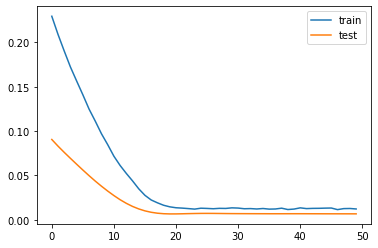

In [43]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#(画图: https://blog.csdn.net/qq_28031525/article/details/79046718)

In [44]:
from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 530.826


#### Multivariate LSTM - With Competitors' Variables

In [69]:
#directly apply and X and y
mcv_dig_250g_with_comp.head()

,Volume,£/kg,Distribution,Promotional Distribution,tesco_RT250g_price_kg,tesco_RT250g_distribution,tesco_molly400g_price_kg,tesco_molly400g_distribution,tesco_RT300g_price_kg,tesco_RT300g_distribution,tesco_digs400g_price_kg,tesco_dig400g_distribution
Date,,,,,,,,,,,,
2014-12-13,6563.0,3.560262,97,0,2.000897,98,0.0,0,0.0,0,1.475527,99
2014-12-20,7179.8,3.560043,97,0,2.000794,98,0.0,0,0.0,0,1.475431,99
2014-12-27,6617.0,3.560118,97,0,2.000896,98,0.0,0,0.0,0,1.475346,99
2015-01-03,4842.8,3.560110,97,0,2.000998,98,0.0,0,0.0,0,1.475504,99
2015-01-10,4856.0,3.559761,97,0,2.001020,98,0.0,0,0.0,0,1.475625,99


In [70]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(mcv_dig_250g_with_comp)

In [71]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or a numpy array.
        n_in: Number of lag observations as input(X).
        n_out: Number of observations as output(y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# mcv_dig_250g_with_comp1=series_to_supervised(mcv_dig_250g_with_comp,1,1)
# mcv_dig_250g_with_comp1.drop(mcv_dig_250g_with_comp1.columns[[13,14,15,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
# mcv_dig_250g_with_comp1.head()

In [72]:
mcv_dig_250g_with_comp1=series_to_supervised(mcv_dig_250g_with_comp,1,1)
mcv_dig_250g_with_comp1.drop(mcv_dig_250g_with_comp1.columns[[13,14,15,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
mcv_dig_250g_with_comp1.head()


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var1(t)
Date,,,,,,,,,,,,,
2014-12-20,6563.0,3.560262,97.0,0.0,2.000897,98.0,0.0,0.0,0.0,0.0,1.475527,99.0,7179.8
2014-12-27,7179.8,3.560043,97.0,0.0,2.000794,98.0,0.0,0.0,0.0,0.0,1.475431,99.0,6617.0
2015-01-03,6617.0,3.560118,97.0,0.0,2.000896,98.0,0.0,0.0,0.0,0.0,1.475346,99.0,4842.8
2015-01-10,4842.8,3.560110,97.0,0.0,2.000998,98.0,0.0,0.0,0.0,0.0,1.475504,99.0,4856.0
2015-01-17,4856.0,3.559761,97.0,0.0,2.001020,98.0,0.0,0.0,0.0,0.0,1.475625,99.0,5394.5


In [73]:
def transform(df):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler = scaler.fit(df)
    scaled_X = scaler.transform(df)
    return scaled_X

In [74]:
mcv_dig_250g_with_comp2=transform(mcv_dig_250g_with_comp1)
mcv_dig_250g_with_comp2=pd.DataFrame(mcv_dig_250g_with_comp2,columns=mcv_dig_250g_with_comp1.columns)
mcv_dig_250g_with_comp2

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var1(t)
0,0.667107,0.227363,0.95122,0.0,0.655917,0.98,0.000000,0.00000,0.000000,0.00,0.999869,0.989899,0.761781
1,0.761781,0.226979,0.95122,0.0,0.655769,0.98,0.000000,0.00000,0.000000,0.00,0.999740,0.989899,0.675395
2,0.675395,0.227109,0.95122,0.0,0.655914,0.98,0.000000,0.00000,0.000000,0.00,0.999626,0.989899,0.403070
3,0.403070,0.227095,0.95122,0.0,0.656060,0.98,0.000000,0.00000,0.000000,0.00,0.999838,0.989899,0.405096
4,0.405096,0.226482,0.95122,0.0,0.656092,0.98,0.000000,0.00000,0.000000,0.00,1.000000,0.989899,0.487751
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0.320491,0.999373,0.00000,0.0,0.999505,1.00,0.996399,0.96875,0.998674,0.83,0.698057,0.979798,0.354674
270,0.354674,0.998398,0.00000,0.0,0.999492,1.00,0.996398,0.96875,0.998722,0.82,0.697925,0.979798,0.327506
271,0.327506,0.999501,0.00000,0.0,0.999543,1.00,0.996374,0.96875,0.998639,0.83,0.698001,0.979798,0.366569
272,0.366569,0.998006,0.00000,0.0,0.999791,1.00,0.996395,0.96875,0.998713,0.83,0.697957,0.979798,0.466385


In [75]:
mcv_dig_250g_with_comp2=mcv_dig_250g_with_comp2.values
train = mcv_dig_250g_with_comp2[:248]
test = mcv_dig_250g_with_comp2[248:]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(248, 12) 248 (248,)
(248, 1, 12) (248,) (26, 1, 12) (26,)


In [76]:
# mcv_dig_250g_with_comp2=mcv_dig_250g_with_comp2.values
# train = mcv_dig_250g_with_comp2[:248]
# test = mcv_dig_250g_with_comp2[248:]

# def create_dataset(dataset, look_back=1):
#     data_X, data_y = [], []
#     for i in range(len(dataset)-look_back-1):
#         a = dataset[i:(i+look_back), 0]
#         data_X.append(a)
#         data_y.append(dataset[i + look_back, 0])
#     return numpy.array(data_X), numpy.array(data_y)

# # look_back = 12
# train_X, train_y = create_dataset(train, look_back)
# test_X, test_y = create_dataset(test, look_back)
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

In [77]:
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=50, batch_size=72, verbose=2)

Train on 248 samples, validate on 26 samples
Epoch 1/50
248/248 - 1s - loss: 0.2449 - val_loss: 0.0873
Epoch 2/50
248/248 - 0s - loss: 0.2177 - val_loss: 0.0656
Epoch 3/50
248/248 - 0s - loss: 0.1896 - val_loss: 0.0476
Epoch 4/50
248/248 - 0s - loss: 0.1645 - val_loss: 0.0334
Epoch 5/50
248/248 - 0s - loss: 0.1438 - val_loss: 0.0235
Epoch 6/50
248/248 - 0s - loss: 0.1238 - val_loss: 0.0176
Epoch 7/50
248/248 - 0s - loss: 0.1044 - val_loss: 0.0164
Epoch 8/50
248/248 - 0s - loss: 0.0868 - val_loss: 0.0207
Epoch 9/50
248/248 - 0s - loss: 0.0750 - val_loss: 0.0309
Epoch 10/50
248/248 - 0s - loss: 0.0641 - val_loss: 0.0440
Epoch 11/50
248/248 - 0s - loss: 0.0551 - val_loss: 0.0557
Epoch 12/50
248/248 - 0s - loss: 0.0487 - val_loss: 0.0643
Epoch 13/50
248/248 - 0s - loss: 0.0424 - val_loss: 0.0681
Epoch 14/50
248/248 - 0s - loss: 0.0406 - val_loss: 0.0652
Epoch 15/50
248/248 - 0s - loss: 0.0378 - val_loss: 0.0584
Epoch 16/50
248/248 - 0s - loss: 0.0329 - val_loss: 0.0507
Epoch 17/50
248/248 

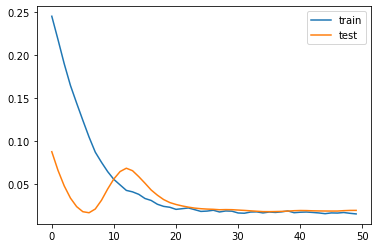

In [78]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [80]:
from numpy import concatenate

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scale1r.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Change point detection

In [ ]:
!pip install ruptures

In [ ]:
# import scipy.stats as stats

# c, p = stats.pearsonr(mcv_dig_250g['Volume'], tes_dig_400g_price['£/kg'])
# print(f"McVitie's Digestives 250g vs Tesco Digestives 400g Correlation: {c}\n")

# c, p = stats.pearsonr(mcv_dig_250g['Volume'], tes_mill_400g_price['£/kg'])
# print(f"McVitie's Digestives 250g vs Tesco Milly 400g Correlation: {c}\n")

# c, p = stats.pearsonr(mcv_dig_250g['Volume'], tes_rt_250g_price['£/kg'])
# print(f"McVitie's Digestives 250g vs Tesco Rich Tea 250g Correlation: {c}\n")

# c, p = stats.pearsonr(mcv_dig_250g['Volume'], tes_rt_300g_price['£/kg'])
# print(f"McVitie's Digestives 250g vs Tesco Rich Tea 300g Correlation: {c}\n")

# c, p = stats.pearsonr(mcv_dig_250g['Volume'], ['£/kg'])
# print(f"TSLA vs SPY Pearson Correlation: {c}")

In [ ]:
# mcv_list=[mcv_dig_250g,mcv_dig_400g,mcv_dig_400g_twin,mcv_rt_300g,mcv_rt_300g_twin]

# for df in mcv_list:
#     c, p = stats.pearsonr(df['Volume'], tes_dig_400g_price['£/kg'])
#     print(f"McVitie's Digestives 250g vs Tesco Digestives 400g Correlation: {c}\n")

#     c, p = stats.pearsonr(df['Volume'], tes_mill_400g_price['£/kg'])
#     print(f"McVitie's Digestives 250g vs Tesco Milly 400g Correlation: {c}\n")

#     c, p = stats.pearsonr(df['Volume'], tes_rt_250g_price['£/kg'])
#     print(f"McVitie's Digestives 250g vs Tesco Rich Tea 250g Correlation: {c}\n")

#     c, p = stats.pearsonr(df['Volume'], tes_rt_300g_price['£/kg'])
#     print(f"McVitie's Digestives 250g vs Tesco Rich Tea 300g Correlation: {c}\n")



lstm

In [24]:
mcv_dig_250g=pd.read_excel("Tesco Large/Tesco Large MCVTS DGSTVS 250G SNGL.xlsx")

def data(x):
    x=x[:275]
    date_time = x['SDESC'].str[3:]
    date_time=pd.to_datetime(date_time, format='%d.%m.%y')
    x['SDESC']=date_time
    x.rename(columns={'SDESC':'Date'}, inplace=True)
    df=x.set_index('Date')
    df=df.drop(['Units', 'Value', '£/unit'], axis=1)
    return df

mcv_dig_250g=data(mcv_dig_250g)


/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
values=mcv_dig_250g.values

In [26]:
# def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
# 	n_vars = 1 if type(data) is list else data.shape[1]
# 	df = DataFrame(data)
# 	cols, names = list(), list()
# 	# input sequence (t-n, ... t-1)
# 	for i in range(n_in, 0, -1):
# 		cols.append(df.shift(i))
# 		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
# 	# forecast sequence (t, t+1, ... t+n)
# 	for i in range(0, n_out):
# 		cols.append(df.shift(-i))
# 		if i == 0:
# 			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
# 		else:
# 			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
# 	# put it all together
# 	agg = concat(cols, axis=1)
# 	agg.columns = names
# 	# drop rows with NaN values
# 	if dropnan:
# 		agg.dropna(inplace=True)
# 	return agg

# mcv_dig_250g=series_to_supervised(mcv_dig_250g,1,1)
# mcv_dig_250g.drop(mcv_dig_250g.columns[[5,6,7]], axis=1, inplace=True)
# print(mcv_dig_250g.head())

In [27]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
  # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = mcv_dig_250g.values
# integer encode direction
#encoder = LabelEncoder()
#values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed.head())


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.667107   0.951219        0.0   0.227363  0.761780
2   0.761780   0.951219        0.0   0.226979  0.675395
3   0.675395   0.951219        0.0   0.227110  0.403070
4   0.403070   0.951219        0.0   0.227096  0.405096
5   0.405096   0.951219        0.0   0.226483  0.487751


In [28]:
# split into train and test sets
values = reframed.values
train = values[:248]
test = values[248:]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(248, 1, 4) (248,) (26, 1, 4) (26,)


Train on 248 samples, validate on 26 samples
Epoch 1/50
248/248 - 1s - loss: 0.4287 - val_loss: 0.2680
Epoch 2/50
248/248 - 0s - loss: 0.3998 - val_loss: 0.2465
Epoch 3/50
248/248 - 0s - loss: 0.3711 - val_loss: 0.2249
Epoch 4/50
248/248 - 0s - loss: 0.3424 - val_loss: 0.2030
Epoch 5/50
248/248 - 0s - loss: 0.3134 - val_loss: 0.1822
Epoch 6/50
248/248 - 0s - loss: 0.2843 - val_loss: 0.1611
Epoch 7/50
248/248 - 0s - loss: 0.2547 - val_loss: 0.1398
Epoch 8/50
248/248 - 0s - loss: 0.2246 - val_loss: 0.1202
Epoch 9/50
248/248 - 0s - loss: 0.1943 - val_loss: 0.1011
Epoch 10/50
248/248 - 0s - loss: 0.1658 - val_loss: 0.0827
Epoch 11/50
248/248 - 0s - loss: 0.1405 - val_loss: 0.0700
Epoch 12/50
248/248 - 0s - loss: 0.1178 - val_loss: 0.0661
Epoch 13/50
248/248 - 0s - loss: 0.0980 - val_loss: 0.0692
Epoch 14/50
248/248 - 0s - loss: 0.0832 - val_loss: 0.0729
Epoch 15/50
248/248 - 0s - loss: 0.0763 - val_loss: 0.0767
Epoch 16/50
248/248 - 0s - loss: 0.0752 - val_loss: 0.0806
Epoch 17/50
248/248 

<Figure size 1656x1080 with 0 Axes>

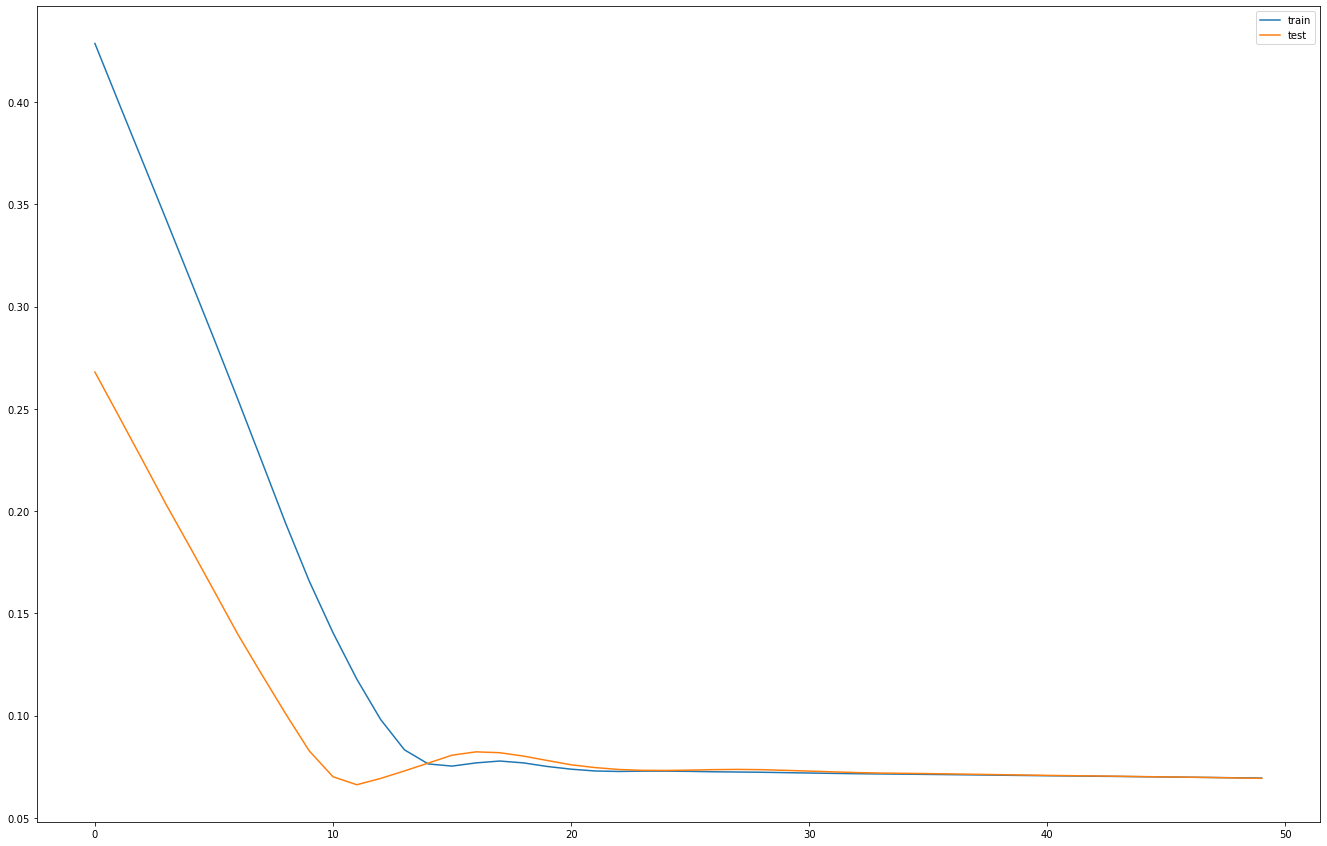

In [29]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.figure(figsize=(23, 15))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [30]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 541.728


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(mcv_dig_250g)

In [ ]:
mcv_dig_250g=series_to_supervised(mcv_dig_250g,1,1)
mcv_dig_250g.drop(mcv_dig_250g.columns[[5,6,7]], axis=1, inplace=True)
print(mcv_dig_250g.head())

In [ ]:
mcv_dig_250g=mcv_dig_250g.values
train = mcv_dig_250g[:248]
test = mcv_dig_250g[248:]

train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
